In [131]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
train_df = pd.read_csv('data/titanic_train.csv')
test_df = pd.read_csv('data/titanic_test.csv')
print(train_df.columns.values)
train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [135]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ross, Mr. John Hugo",male,347082,G6,S
freq,1,577,7,4,644


In [137]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Как и предполагалось, люди с более высоким социально-экономическим классом имели более высокий уровень выживания

In [138]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


У женщин больше шансов выжить чем у мужчин

In [139]:
train_df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Кажется, что у пассажиров, имеющих много братьев и сестер/супругов, меньше шансов выжить
Одиночные пассажиры (0 SibSP) или два других человека (SibSP 1 или 2) имеют больше шансов выжить

In [140]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


У маленьких семей больше шансов выжить, чем у одиночных (Parch 0), средних (Parch 3,4) и многодетных (Parch 5,6).

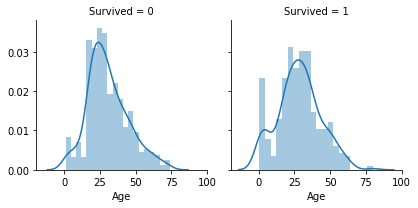

In [141]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.distplot, 'Age', bins=20)

Таким образом, даже если «Age» не коррелируем с «Survived», мы можем видеть, что есть возрастные категории пассажиров, у которых больше или меньше шансов выжить.

Кажется, что у очень молодых пассажиров больше шансов выжить. 

c:\users\danj\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


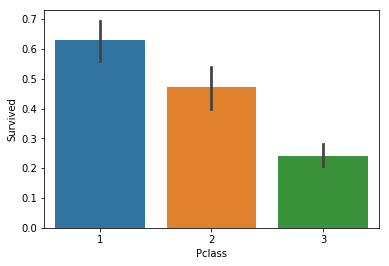

In [142]:
sns.barplot(x="Pclass", y="Survived", data=train_df)

c:\users\danj\appdata\local\programs\python\python35\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\danj\appdata\local\programs\python\python35\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


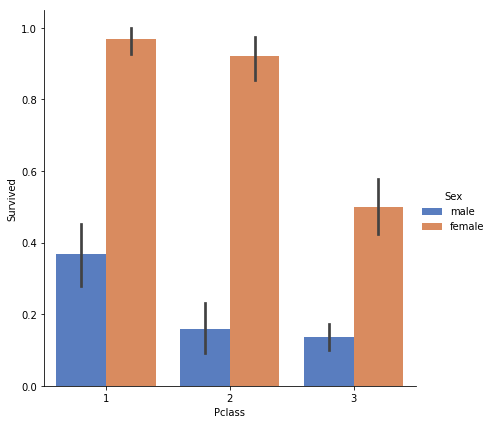

In [143]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
                   size=6, kind="bar", palette="muted")

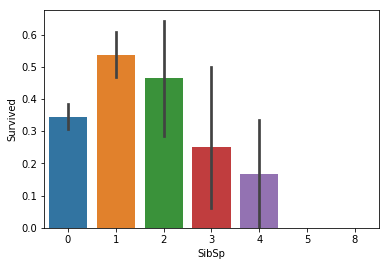

In [144]:
sns.barplot(x="SibSp",y="Survived",data=train_df)

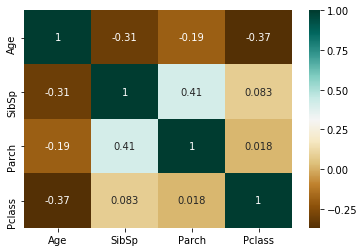

In [145]:
g = sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

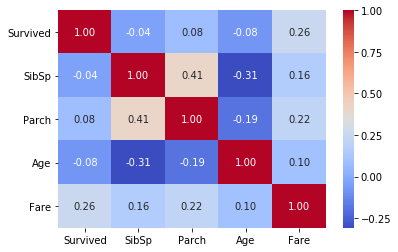

In [146]:
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Похоже, только Fare имеет существенную корреляцию с вероятностью выживания.
Это не значит, что другие функции бесполезны.

In [147]:
train_df.Sex = train_df.Sex.replace({'male':1, 'female': 0})
test_df.Sex = test_df.Sex.replace({'male':1, 'female': 0})

меняем тип что бы мы могли закинуть в модель

In [148]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

так-как Cabin имеет много пропусков уберем эту информацию
А у Ticket 681/891 уникальных значений, 

In [149]:
combine = [train_df, test_df]

In [150]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Вычленяем звание из имени чтобы посмотреть на зависимость между ними

In [151]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Заменим редко встречающиеся звания на Rare и далее заменим котигориальный тип

In [152]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1


In [153]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)
combine = [train_df, test_df]

In [154]:
train_df.Age = train_df.Age.fillna(train_df.Age.mean())
train_df.Age = train_df.Age.astype(int)

In [155]:
train_df.Embarked[train_df.Embarked == 'S'].shape

(644,)

так как большенство людей из S класса и кол-во null мало заменим всех на S

In [156]:
train_df.Embarked = train_df.Embarked.fillna('S')

In [157]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [158]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


AgeBand нам больше не понадобится 

In [159]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

In [160]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,1,1
1,1,1,0,2,1,0,71.2833,2,3
2,1,3,0,1,0,0,7.9250,1,2
3,1,1,0,2,1,0,53.1000,1,3
4,0,3,1,2,0,0,8.0500,1,1


In [161]:
#data.Sex = data.Sex.apply(lambda x: 1 if x == 'male' else 0)
# data.Sex = data.Sex.replace({'male':1, 'female': 0})
# data.Age = data.Age.fillna(data.Age.mean())

In [162]:
# sns.distplot(train_df.Age)
# plt.show()
# sns.countplot(x = "Sex", hue="Survived", data = train_df)
# plt.show()